In [140]:
#CRISTIAM FAJARDO - DATASET REGRESION LOGISTICA - Titanic - UNAD 

In [197]:
#Preparacion inicial : Cargar librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [198]:
#Paso 1 : analisis exploratorio
Dataset = pd.read_csv('./Titanic-Dataset.csv')

In [199]:
Dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [200]:
#Valores estadisticos del dataset 
Dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [201]:
#Paso 2: preprocesado de datos

In [202]:
#Busqueda de datos con valores erroneos o Nulos
print("Cantidad de registros con valor 2 en Sobrevivio: ", Dataset['Survived'].isin([2]).sum())
print("Cantidad de registros con valor nulo en Nombre: ", Dataset['Name'].isnull().sum())
print("Cantidad de registros con valor 0 en Clase: ", Dataset['Pclass'].isin([0]).sum())
print("Cantidad de registros con valor nulo en Edad: ", Dataset['Age'].isnull().sum())
print("Cantidad de registros con valor 0 en Tarifa: ", Dataset['Fare'].isin([0]).sum())

Cantidad de registros con valor 2 en Sobrevivio:  0
Cantidad de registros con valor nulo en Nombre:  0
Cantidad de registros con valor 0 en Clase:  0
Cantidad de registros con valor nulo en Edad:  177
Cantidad de registros con valor 0 en Tarifa:  15


In [203]:
#Reemplazar los valores de Tarifa por el valor de la media
mean_age = Dataset['Age'].mean()
Dataset['Age'].fillna(mean_age, inplace=True)

In [204]:
#Reemplazar los valores nulos de Edad  por el valor de la media
Dataset['Fare']=Dataset['Fare'].replace(0,Dataset['Fare'].mean())

In [205]:
#Comprobacion aplicacion de cambios
print("Cantidad de registros con valor 0 en Tarifa: ", Dataset['Fare'].isin([0]).sum())

Cantidad de registros con valor 0 en Tarifa:  0


In [206]:
#Comprobacion aplicacion de cambios
print("Cantidad de registros con valor nulo en Edad: ", Dataset['Age'].isnull().sum())

Cantidad de registros con valor nulo en Edad:  0


Text(0.5, 1.0, 'Grafica datos faltantes y atipicos')

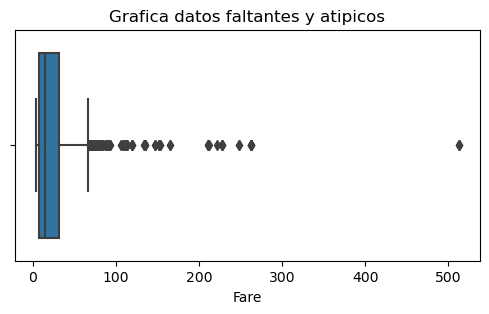

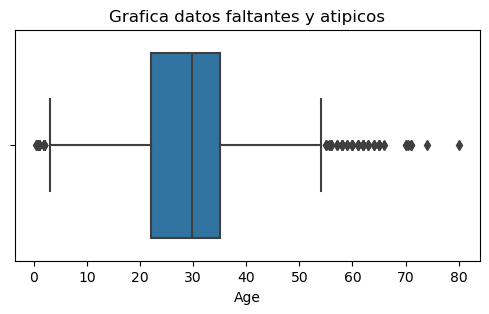

In [207]:
#Grafica de datos faltantes y atipicos en Clase
plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Fare'])
plt.title('Grafica datos faltantes y atipicos', fontsize=12)

#Grafica de datos faltantes y atipicos en Edad
plt.figure(figsize=(6, 3))
sns.boxplot(x=Dataset['Age'])
plt.title('Grafica datos faltantes y atipicos', fontsize=12)

In [208]:
#Rango datos atipicos Tarifa
Nivel_minimo=1
Nivel_maximo=300
Total_atipicos_Tarifa=((Dataset['Fare']<Nivel_minimo)|(Dataset['Fare']>Nivel_maximo)).sum()
print("El total de datos atipicos en Tarifa es: {}".format(Total_atipicos_Tarifa))

#Rango datos atipicos Edad
Nivel_minimo=1
Nivel_maximo=90
Total_atipicos_Edad=((Dataset['Age']<Nivel_minimo)|(Dataset['Age']>Nivel_maximo)).sum()
print("El total de datos atipicos en Edad es: {}".format(Total_atipicos_Edad))

El total de datos atipicos en Tarifa es: 3
El total de datos atipicos en Edad es: 7


In [209]:
#Retirar datos atipicos Tarifa
Dataset=Dataset[(Dataset['Fare']<Nivel_maximo)&(Dataset['Fare']>Nivel_minimo)]

#Retirar datos atipicos Edad
Dataset=Dataset[(Dataset['Age']<Nivel_maximo)&(Dataset['Age']>Nivel_minimo)]

In [210]:
#Confirmacion eliminacion datos atipicos en Tarifa
Atipicos_Tarifa=((Dataset['Fare']<Nivel_minimo)|(Dataset['Fare']>Nivel_maximo)).sum()
print("El total de datos atipicos en Tarifa es: {}".format(Atipicos_Tarifa))

#Confirmacion eliminacion datos atipicos en Edad
Atipicos_Edad=((Dataset['Age']<Nivel_minimo)|(Dataset['Age']>Nivel_maximo)).sum()
print("El total de datos atipicos en Edad es: {}".format(Atipicos_Edad))

El total de datos atipicos en Tarifa es: 0
El total de datos atipicos en Edad es: 0


In [211]:
#Informacion total actual
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  817 non-null    int64  
 1   Survived     817 non-null    int64  
 2   Pclass       817 non-null    int64  
 3   Name         817 non-null    object 
 4   Sex          817 non-null    object 
 5   Age          817 non-null    float64
 6   SibSp        817 non-null    int64  
 7   Parch        817 non-null    int64  
 8   Ticket       817 non-null    object 
 9   Fare         817 non-null    float64
 10  Cabin        152 non-null    object 
 11  Embarked     815 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.0+ KB


In [212]:
#Paso 3 : Seleccion caracteristica para entrenar el modelo

In [213]:
#Total personas Sovrevivientes
print(Dataset['Survived'].value_counts())

Survived
0    532
1    285
Name: count, dtype: int64


In [214]:
#Paso 4 : Dividir el dataset en Train y test

In [215]:
#Eliminacion columna Nombre, Sexo, Ticket, Cabina y Embarcacion debido a que contienen valores string y por lo tanto no pueden ser procesados
Dataset = Dataset.drop(columns=['Name'])
Dataset = Dataset.drop(columns=['Sex'])
Dataset = Dataset.drop(columns=['Ticket'])
Dataset = Dataset.drop(columns=['Cabin'])
Dataset = Dataset.drop(columns=['Embarked'])

In [216]:
#Creacion de variables X y Y para almacenar la informacion
X = Dataset.drop('Survived',axis=1) #Datos sin columna Sobreviviente
Y = Dataset['Survived'] #Datos de la columna Sobreviviente

#Asignacion de 80% Train y 20% Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=0)

In [217]:
#Datos sin columna Sobreviviente
print (X_train)

     PassengerId  Pclass        Age  SibSp  Parch     Fare
7              8       3   2.000000      3      1  21.0750
691          692       3   4.000000      0      1  13.4167
108          109       3  38.000000      0      0   7.8958
178          179       2  30.000000      0      0  13.0000
446          447       2  13.000000      0      1  19.5000
..           ...     ...        ...    ...    ...      ...
202          203       3  34.000000      0      0   6.4958
303          304       2  29.699118      0      0  12.3500
625          626       1  61.000000      0      0  32.3208
260          261       3  29.699118      0      0   7.7500
4              5       3  35.000000      0      0   8.0500

[653 rows x 6 columns]


In [218]:
#Datos columna Sobreviviente
print (Y_train)

7      0
691    1
108    0
178    0
446    1
      ..
202    0
303    1
625    0
260    0
4      0
Name: Survived, Length: 653, dtype: int64


In [219]:
#Paso 5 : Entrenar modelo

In [220]:
#Creacion modelo de regresion logistica
Modelo_regresion = LogisticRegression(solver = "liblinear")
Modelo_regresion.fit (X_train, Y_train)

#Declaracion variable de pronostico
Pronostico = Modelo_regresion.predict(X_test)

In [221]:
print (Y_test)

839    1
546    1
633    0
846    0
709    1
      ..
177    0
194    1
51     0
492    0
59     0
Name: Survived, Length: 164, dtype: int64


In [222]:
#Impresion del pronostico
print (Pronostico)

[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


In [223]:
#Paso 6 : Evaluar desempeño del modelo 

In [224]:
print (classification_report(Y_test, Pronostico))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       107
           1       0.60      0.37      0.46        57

    accuracy                           0.70       164
   macro avg       0.66      0.62      0.62       164
weighted avg       0.68      0.70      0.67       164



In [225]:
#Paso 7 : Graficas con los resultados

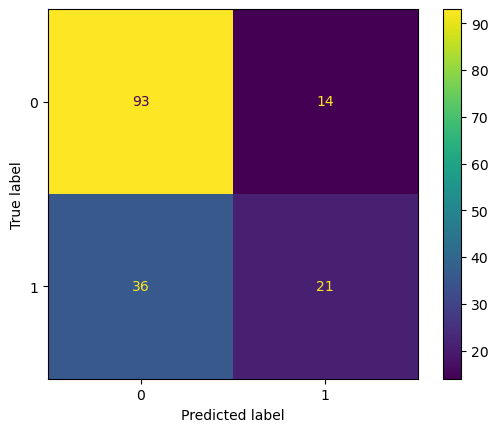

In [226]:
#Matrix de confusion

cm=confusion_matrix(Y_test,Pronostico)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

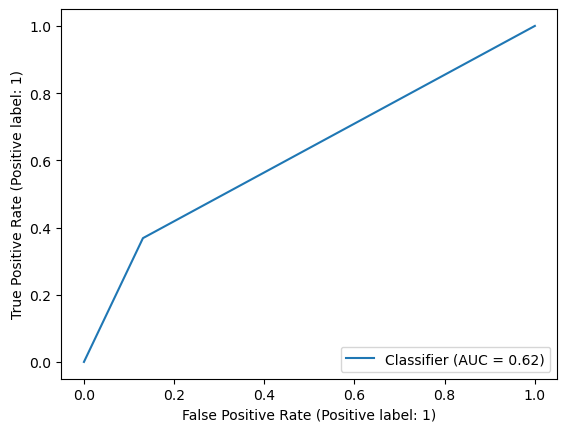

In [227]:
#Curva de prediccion

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Pronostico)
plt.show()

In [228]:
#Paso 8 y 9 : Resultados y carga de codigo GITHUB
#Se documentan los resultados obtenidos en el documento que se entregara en el entorno de evaluacion junto con el enlace del repositoriode GITHUB